<small><i>October 2018 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

# A pragmatic introduction to Machine Learning

## What is Machine Learning?

**Machine Learning** (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via a parameterized model with tunable parameters automatically adjusted according to a performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

   1. Supervised learning : Algorithms which learn from a training set of labeled examples (exemplars) to generalize to the set of all possible inputs. Examples of techniques in supervised learning include regression and support vector machines.
    
   2. Unsupervised learning : Algorithms which learn from a training set of unlableled examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.
    
   3. Reinforcement learning : Algorithms that learn via reinforcement from a critic that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## News topic classification

<center><img src="files/The_New_York_Times_logo.png"></center>
In this example, our goal is to automatically categorize news according to their title into twenty-eight standard topics. In this problem we will deal with every New York Times front page story from 1996 to 2006, coded according to the Policy Agendas (http://www.policyagendas.org). This collection of data has been compiled by Amber E. Boydstun.

Specifically, we are interested in classifying news from The New York Times in the following macro-topics according to its title:



<table border="1">
<tr>
<td>
1 
<td>
Macroeconomics
<tr>
<td>
2 
<td>
Civil Rights, Minority Issues, and Civil Liberties 
<tr>
<td>
3
<td>
Health
<tr>
<td>
4 
<td>Agriculture
<tr>
<td>
5 
<td>Labor, Employment, and Immigration
<tr>
<td>
6 
<td> Education
<tr>
<td>
7
<td>Environment
<tr>
<td>
8
<td>Energy
<tr>
<td>
10 
<td>Transportation
<tr>
<td>
12 
<td>Law, Crime, and Family Issues
<tr>
<td>
13 
<td>Social Welfare
<tr>
<td>
14 
<td>Community Development and Housing Issues
<tr>
<td>
15 
<td>Banking, Finance, and Domestic Commerce
<tr>
<td>
16 
<td>Defense
<tr>
<td>
17 
<td>Space, Science, Technology and Communications
<tr>
<td>
18 
<td>Foreign Trade
<tr>
<td>
19 
<td>International Affairs and Foreign Aid
<tr>
<td>
20 
<td>Government Operations
<tr>
<td>
21 
<td>Public Lands and Water Management
<tr>
<td>
24 
<td>State and Local Government Administration
<tr>
<td>
26 
<td>Weather and Natural Disasters
<tr>
<td>
27 
<td>Fires
<tr>
<td>
28 
<td>Arts and Entertainment
<tr>
<td>
29 
<td>Sports and Recreation
<tr>
<td>
30 
<td>Death Notices
<tr>
<td>
31 
<td>Churches and Religion
<tr>
<td>
99 
<td>Other, Miscellaneous, and Human Interest


In [3]:
%reset -f
#load data
import pandas as pd
data=pd.read_csv('./files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()



Article_ID      Date Article_Sequence  \
0           1  1/1/1996                a   
1           2  1/1/1996                b   
2           3  1/1/1996                c   
3           4  1/1/1996                d   
4           5  1/1/1996                e   

                                               Title  \
0  Nation's Smaller Jails Struggle To Cope With S...   
1             Dancing (and Kissing) In the New Year    
2   Forbes's Silver Bullet for the Nation's Malaise    
3  Up at Last, Bridge to Bosnia Is Swaying Gatewa...   
4  2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...   

                                             Summary  Topic_6digit  \
0          Jails overwhelmed with hardened criminals        120500   
1                               new years activities        280000   
2                 Steve Forbes running for President        201201   
3  U.S. military constructs bridge to help their ...        160200   
4  Democrats and Republicans can't agree on plan ...        201206   

   Topic_4digit  Topic_2digit  War on Terror  Katrina  Israel/Palestine  \
0          1205            12              0        0                 0   
1          2800            28              0        0                 0   
2          2012            20              0        0                 0   
3          1602            16              0        0                 0   
4          2012            20              0        0                 0   

   Immigration  Presidential Elections  Clinton Impeachment  Enron  Darfur  \
0            0                       0                    0      0       0   
1            0                       0                    0      0       0   
2            0                       1                    0      0       0   
3            0                       0                    0      0       0   
4            0                       0                    0      0       0   

   Race/Ethnicity  Schiavo  
0               0        0  
1               0        0  
2               0        0  
3               0        0  
4               0        0

In [6]:
import numpy as np
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
X = data['Title']
y = data['Topic_2digit']
print ('Check the split sizes, train, test and total amount of data:')
print (X.shape)
print ('Display the labels:')
print (np.unique(y))


Check the split sizes, train, test and total amount of data:
(31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


<div class = "alert alert-warning">**Supervised learning as mapping:** In machine learning we are looking for an algorithmic model (this includes mathematical models) such, $h: X \rightarrow y$, that maps input data $X$ to output target values $y$.
</div>

In [8]:
X[0],y[0]

("Nation's Smaller Jails Struggle To Cope With Surge in Inmates ", 12)

<div class = "alert alert-warning">**Importance of numbers:** However, most of this methods require the input space $X$ be numerical, i.e. $X=\{x_i\}, i=1,\dots,N$ and $x_i\in \mathbb{R}^d$
</div>

A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical.

$${\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

#### Data set jargon

Considering data arranged as in the previous section we refer to:

+ the **columns** as features, attributes, dimensions, regressors, covariates, predictors, independent variables,
+ the **rows** as instances, examples, samples.
+ the **target** as label, outcome, response, dependent variable.

<div class="alert alert-success"> **EXERCISE:** In pairs, discuss how to convert the problem at hand into a numerical problem.


</div>

# 2. Knowledge representation


A very important issue in machine learning is knowledge representation. This states for the fact of describing what we know about the data that can help in the supervised learning problem. This is usually referred as domain expertise. 


In natural language processing, a very simple description of a document is the **bag-of-words** approach. This representation transforms a complete text to a vector of $d$ predefined words. The set of predefined words is selected by the practicioner. For example, the list can consist of the set of all words in a given language. This is technique can be used whenever we are in front of categorical data, and it is called **one-hot encoding**.

<b>Example 1:</b>
Suppose we are given four different documents belonging to the topics $y=\{\text{'economics'},\text{'technology'}\}$ and we select as our representation the following bag-of-words $x = \{\text{'market'}, \text{'stock'}, \text{'price'}, \text{'application'}, \text{'mobile'}, \text{'google'}\}$. We can count the number of times a certain term appears in that document and expect that this description is discriminative enough for identifying the document topic. Check the following example:

<table border="1">
<tr>
<td></td>
<td>market</td>
<td>stock</td>
<td>price</td>
<td>application</td>
<td>mobile</td>
<td>google</td>
</tr>
<tr>
<td>document 1($\text{'economics'}$)</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>document 2($\text{'economics'}$)</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>document 3($\text{'technology'}$)</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>3</td>
<td>1</td>
</tr>
<tr>
<td>document 4($\text{'technology'}$)</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
</tr>
</table>

In this representation, document 2 is represented by the vector (0,1,2,0,0,1). We can alternatively use a binary value representing whether a term appears or not in the document. In this last case document would be represesnted by (0,1,1,0,0,1).

Observe that this is a context free representation, i.e. the order of the words is not considered. Consider the sentences "Google reduces the prices of applications in App market" and "The number of aplications in Google App market with cheap prices is reduced by 20%". The representation for both sentences is the same, though the exact meaning of both sentences is completely different. However, this kind of representation may be enough for identifying that both refers to $\text{'technology'}$.


But ... how do I do it? And... other questions

+ What about capital letters?
+ Should I represent determinants or conjunctions?
+ What about extremely rare words with one or two occurrences?
+ ... and contractions?

In [11]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 
# stop words such as 'and', 'the', 'of' are removed                             
 stop_words='english', 
 strip_accents='unicode')

#example of the tokenization
test_string = X[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Process and convert data
X_train = vectorizer.fit_transform(X)

print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokens:")
print (vectorizer.get_feature_names()[1000:1100])


Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 10418

Extract of tokens:
['belgian', 'belgium', 'belgrade', 'beliefs', 'belies', 'believe', 'believed', 'believes', 'belittles', 'bell', 'bellow', 'bellwether', 'beloved', 'belt', 'belts', 'beltway', 'bench', 'bending', 'beneath', 'benefit', 'benefits', 'benjamin', 'bent', 'bereavement', 'berets', 'berkeley', 'berlin', 'berlusconi', 'bermuda', 'beset', 'besieged', 'best', 'bet', 'beta', 'bethlehem', 'betrayal', 'betrayed', 'betrayer', 'bets', 'better', 'betting', 'betty', 'beware', 'bhutto', 'bias', 'biased', 'biases', 'bible', 'bicker', 'bid', 'bidding', 'bids', 'big', 'bigger', 'biggest', 'biker', 'bilingual', 'bilking', 'bil

Check variable X_train:

In [14]:
X_train[0,:]

<1x10418 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

## Learning a prediction model

Once we have the data in a numerical format we can learn a classifier that is able to map in put features into desired labels. 

In a supervised classification problem, given a set of examples with their corresponding label, our goal is to predict the membership of a given instance to one of a predefined discrete set of classes. 

Formally, we can describe the problem as follows: Consider a set *training set* composed of $N$ data sample pairs $\{(x_i,y_i)\}, \quad i =1,\dots,N$ where $x_i \in {\bf R}^d$ is described by $d$ features, and its corresponding supervised label, e.g. in the simplest binary case $y_i = \{-1,1\}$. Our goal is to find a model $h:{\bf R}^d \rightarrow {\bf R}$ such that given a new data sample $x$ it correctly predicts its label $y$, i.e. $h(x) = y$.


In machine learning, we usually call this process:

+ **Training**. Given a set of data instances $x$ and their corresponding label $y$ we want to learn/<span style="color:red">fit</span> a model.

In [30]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<div class = "alert alert-danger"> Congratulations, you have trained your first machine learning model.
</div>

**Are we done?**

(Obviously not, otherwise this postgraduate course ...)

Well, at most we want to know how this method is going to perform when we put it in production. 

In machine learning we call this second process:

+ **Testing or exploitation**. Given a model we want to apply it to new unseen data in order to <span style="color:red">predict</span> its label.


In [31]:
yhat = knn.predict(X_train[0,:])

print ('Predicted value: ', yhat, '- Real value: ',y[0])

Predicted value:  [12] - Real value:  12


In order to evaluate the performance of the classifier, prediction accuracy can used:
$$acc  = \frac{\mbox{# of correct predictions}}{N}$$

Each estimator has a *.score()* method that invokes the default scoring metric. In the case of k-Nearest Neighbors this is classification accuracy.

In [32]:
#Check the performance on the training set 
# - IF YOU KNOW WHAT YOU ARE DOING YOU WILL NEVER DO THIS AGAIN!
knn.score(X_train,y)

0.9914609782818844

<div class = "alert alert-success">
**EXERCISE:** Wrap up all the former lines in a single cell: Train and score the problem. 
</div>

In [33]:
# YOUR CODE

<div class = "alert alert-success">**QUESTION :** 

<li> Which is the accuracy of this classifier on the training set?
<li> But ... is this a good simulation of the exploitation process?
</div>

Let us introduce the concept of **test data**. In reality, machine learning is to be used in new unseen data. Can we guarantee that our learning model will perform well in front of unseen data? We will see the performance guarantees in future sessions, but for the moment, let us consider the simulation of that process. 

Thus we will split the dataset in two parts: 
+ One of these parts will be used for learning the model. This is for training. 
+ The other part will be used to simulate the application of the model in front of unseen data and as an estimation of model performance in exploitation time.

Now we split in two sets

In [40]:
import numpy as np
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
split = pd.to_datetime(pd.Series(data['Date']))<pd.datetime(2004, 1, 1)
raw_data = data['Title']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]
print ('Check the split sizes, train, test and total amount of data:')
print (raw_train.shape, raw_test.shape, raw_data.shape)
print ('Display the labels:')
print (np.unique(y))


Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


<div class = "alert alert-success"> **EXERCISE:** Train the model in the training data set and evaluate the performance in the test set. Use the same nearest neighbors model as in the previous case and report train accuracy and test accuracy.
</div> 

In [ ]:
# YOUR CODE HERE

There are different criteria for measuring performance of a classifier and the most adequate metric is usually problem dependent. When no prior information on the problem in given, we usually use classification accuracy. When we are in front of a multi-class problem (there are many classes to choose from) we may use the confusion matrix. The elements of the **confusion matrix** $M$ are defined as follows,
$$M(i,j) = \mbox{# of samples from class j predicted as class i}$$

Let us check these values:

Train classification accuracy: 0.9890179782903663


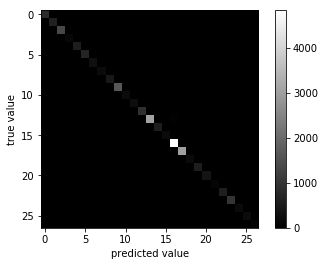

Test classification accuracy: 0.19154362416107382


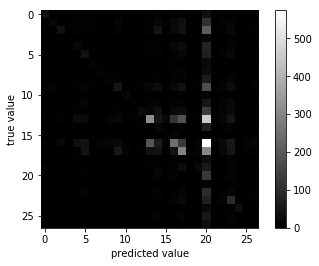

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_confusion_matrix(y, y_pred):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.gray, interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    
    
yhat = clf.predict(X_train)
print ("Train classification accuracy:", metrics.accuracy_score(y_train, yhat))
plot_confusion_matrix(y_train, yhat)
plt.show()


yhat = clf.predict(X_test)
print ("Test classification accuracy:", metrics.accuracy_score(y_test, yhat))
plot_confusion_matrix(y_test, yhat)
plt.show()




<div class = "alert alert-success">**QUESTION:** Which are the classes with more confusion?
</div>

<div class = "alert alert-warning"> Whenever the simulated performance values differ a lot from the training performance values we are roughly talking about one of the most important problems in machine learining. This is called **OVERFITTING** and roughly describes that the learning model is focusing too much on data. Think about memorizing the exact values of the pairs in the training set. What would you say if you are faced with an example not in the set?
</div>

**IMPORTANT OBSERVATION: ** In this scenario, the partition is straightforward because of the temporal axis. However we could have choosen many different partition points. In general when data is idependent and identically distributed one may create different training-test replicas reshuffling and splitting the data. Because of this randomization each time we train on one train-test partition we will get a different value. It is interesting, then, to repeat the process several times and aggregate.

It is clear that this model does not work well. We have not discussed it yet, but models may have parameters that shapes the approximation properties of the mapping function. In the case of k-nn, we have the value `n_neighbors`. May be we can change this parameter and see if it works better.

Using the expected error on the test set, we can select the best classifier for our application. This is called **model selection**. In this example we cover the most simplistic setting. Suppose we have a set of different classifiers and want to select the "best" one. We may use the one that yields the lowest error rate. 

Text(0,0.5,'Accuracy')

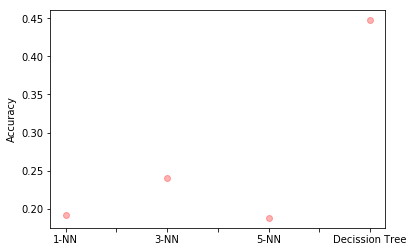

In [61]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

acc_r=np.zeros((1,4))

nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
nn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
dt = tree.DecisionTreeClassifier()

nn1.fit(X_train,y_train)
nn3.fit(X_train,y_train)
nn5.fit(X_train,y_train)
dt.fit(X_train,y_train)

yhat_nn1=nn1.predict(X_test)
yhat_nn3=nn3.predict(X_test)
yhat_nn5=nn5.predict(X_test)
yhat_dt=dt.predict(X_test)

acc_r[0][0] = metrics.accuracy_score(yhat_nn1, y_test)
acc_r[0][1] = metrics.accuracy_score(yhat_nn3, y_test)
acc_r[0][2] = metrics.accuracy_score(yhat_nn5, y_test)
acc_r[0][3] = metrics.accuracy_score(yhat_dt, y_test)


for i in range(4):
    plt.plot(i,acc_r[0,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['','1-NN','','3-NN','','5-NN','','Decission Tree'])
ax.set_ylabel('Accuracy')

We can easily do this using the sklearn interface.

In [62]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection
from sklearn import neighbors

from sklearn import model_selection

parameters = {'n_neighbors':[1,3,5,7]}
knn= neighbors.KNeighborsClassifier()
clf = model_selection.GridSearchCV(knn, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [65]:
print('CV scores: ', clf.cv_results_['mean_test_score'])

print('best parameter: ',clf.best_params_)

CV scores:  [0.20505427 0.23024084 0.20488467 0.20980326]
best parameter:  {'n_neighbors': 3}


It is also good to know that the module `model_selection` has the function `train_test_split()`.

**A brief final note on the data set splitting:** Whenever we use a subset of data for model selection purposes, this is called **validation set**. As we will see later in the course the values obtained in the validation set are **NOT** a good approximation of the performance we could expect in exploitation. It is an optimistic upper bound of that. 

### Train, Test and Validation.

As we have seen the process of assessing the performance of the classifier by estimating the generalization error is called testing. And the process of selecting a model using the estimation of the generalization error is called validation. There is a subtle but critical difference in both and we have to be aware of it when dealing with our problem. 

+ Testing data is used only for assessing performance and will never be used in the learning process or in model selection.
+ Validation data is used to explicitly select the parameter with best performance according to an estimation of the generalization error. As we will discuss later in the course, this is a form of learning. 
+ Training data is used for learning the model instance from a model class.

### Reference: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Exercise


<div class = "alert alert-success"> **EXERCISE: **
<ul>
<li> Extend the training data set using instead of the title, the combination of the title and the summary. In the feature extraction step (when you convert the text into a numerical set) you might consider changing the parameters of `CountVectorizer`. 

<li> Look for the best classifier in this setting. For example you can select some classifier from the following set:
    <ul>
    <li> Logistic regression 
    <li> Support vector machines
    <li> Boosting
    <li> Random Forest
    <li> Decision trees
    </ul>    

<li> What is the expected (simulated) accuracy performance of the best classifier obtained?
</ul>    
</div>

In [ ]:
#YOUR CODE HERE